In [1]:
import json
import pandas as pd

with open("via_export_coco_dogs.json",encoding='utf-8', errors='ignore') as json_data:
     data = json.load(json_data, strict=False)

In [2]:
x = pd.DataFrame.from_dict(data['annotations'])
y = pd.DataFrame.from_dict(data['images'])

In [3]:
x.head()

,area,bbox,id,image_id,iscrowd,segmentation
0,65156,"[75, 47, 182, 358]",0,0,0,"[75, 47, 257, 47, 257, 405, 75, 405]"
1,117390,"[112, 31, 258, 455]",1,1,0,"[112, 31, 370, 31, 370, 486, 112, 486]"
2,100100,"[3, 62, 260, 385]",2,2,0,"[3, 62, 263, 62, 263, 447, 3, 447]"
3,74168,"[204, 10, 254, 292]",3,3,0,"[204, 10, 458, 10, 458, 302, 204, 302]"
4,115005,"[7, 86, 451, 255]",4,4,0,"[7, 86, 458, 86, 458, 341, 7, 341]"


In [6]:
df = y.merge(x, on='id', how='left').drop(columns = ['license','date_captured', 'image_id', 'iscrowd','segmentation','area' ]).rename(columns = {'width':'img_width', 'height':'img_height'})

In [7]:
width = []
height = []
x = []
y = []
for i in range(0,len(df)):
    x.append(df['bbox'][i][0])
    y.append(df['bbox'][i][1])
    width.append(df['bbox'][i][2])
    height.append(df['bbox'][i][3])
df['x'], df['y'],df['bbox_width'], df['bbox_height'] = x, y, width, height

In [8]:
# Normalizing the  image

df['Norm_bbox_width'], df['Norm_bbox_height'] = df['bbox_width']/df['img_width'], df['bbox_height']/df['img_height']

df['Norm_x'], df['Norm_y'] = df['x']/df['img_width'], df['y']/df['img_height']

In [9]:
new_df = df[['file_name', 'Norm_bbox_width', 'Norm_bbox_height',
       'Norm_x', 'Norm_y' ]]

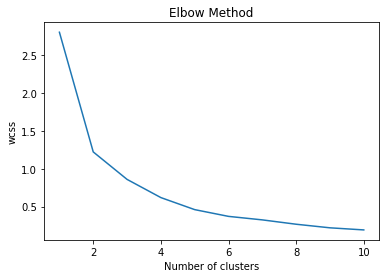

In [14]:
kmeans_data = new_df.iloc[:,[1,2]].values

from sklearn.cluster import KMeans

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

wcss=[]

for i in range(1,11):
  kmeans = KMeans(n_clusters=i,init='k-means++',max_iter = 300,n_init=10,random_state=0)
  kmeans.fit(kmeans_data)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.xlabel("Number of clusters")
plt.ylabel("wcss")
plt.title("Elbow Method")
plt.show()

In [11]:
kmeans=KMeans(n_clusters=2,init='k-means++',max_iter = 300,n_init=10,random_state=0)

y_kmeans=kmeans.fit_predict(kmeans_data)

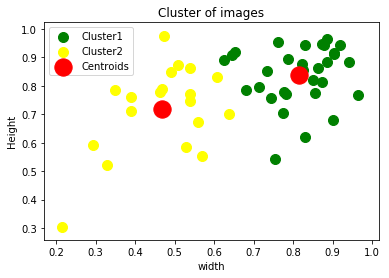

In [13]:
plt.scatter(kmeans_data[y_kmeans==0, 0], kmeans_data[y_kmeans ==0, 1], s=100, c='green', label = 'Cluster1')
plt.scatter(kmeans_data[y_kmeans==1, 0], kmeans_data[y_kmeans ==1, 1], s=100, c='yellow', label = 'Cluster2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label = 'Centroids') 
plt.title('Cluster of images')
plt.xlabel('width')
plt.ylabel ('Height')
plt.legend()
plt.show()